In [8]:
#we will check how likely you are about to get flu with their respective temperature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [9]:
data_flu = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/Flu_analysis/flu_pneumonia.CSV')
data_flu.head()
data_flu.count()

state         50
death_rate    50
death_abs     50
dtype: int64

In [11]:
data_temp = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/Flu_analysis/avg_winter_temperature.csv')
data_temp.head()
data_temp.count()

state          50
avg_celsius    50
dtype: int64

In [12]:
combined_data = pd.merge(data_flu,data_temp, on='state')

In [13]:
combined_data.head()

,state,death_rate,death_abs,avg_celsius
0,AK,8.4,41,-16.3
1,AL,19.5,1097,8.1
2,AR,20.0,700,5.3
3,AZ,9.5,775,6.4
4,CA,14.8,6188,7.9


In [15]:
#create a function to covert the temperature
def covnert_cel_to_fah(temp):
    return temp*1.8+32


In [22]:
def convert_temperature(temp,unit):
    if unit == 'F':
        return (temp-32)/1.8
    elif unit == 'C':
        return (temp*1.8)+32
    else:
        return('error')

In [26]:
print (convert_temperature(77,'F'))

25.0


In [28]:
#create another column for avg fahrenheit
combined_data['avg_fahrenheit']= np.nan


In [30]:
for i in range(len(combined_data)):
    combined_data.loc[i,'avg_fahrenheit']=  convert_temperature(combined_data.avg_celsius[i],'C')

In [31]:
combined_data.head()

,state,death_rate,death_abs,avg_celsius,avg_fahrenheit
0,AK,8.4,41,-16.3,2.66
1,AL,19.5,1097,8.1,46.58
2,AR,20.0,700,5.3,41.54
3,AZ,9.5,775,6.4,43.52
4,CA,14.8,6188,7.9,46.22


In [34]:
# i have done the correlation b/w the death avd and avf celsius coz in germany we used celcius , but you can do the vice versa
np.corrcoef(combined_data.avg_celsius,combined_data.death_rate)[0,1]

0.30437026828296376

In [35]:
np.corrcoef(combined_data.avg_celsius,combined_data.death_abs)[0,1]

0.2840661113005107

In [36]:
def interpret_corrcoef(value):
    if (value == -1):
        print('perfect negative relationship')
    elif(value > -1 and value <= -0.7):
        print('strong negative relationship')
    elif(value > -0.7 and value <= -0.5):
        print('moderate negative relationship')
    elif(value > -0.5 and value <=-0.3):
        print('weak negative')
    elif(value > -0.3 and  value <= 0.3):
        print('no relationship')
    elif(value > 0.3 and value <= 0.5):
        print('weak positive relationship')
    elif(value > 0.5 and value <= 0.7):
        print('moderate positive relationship')
    elif(value > 0.7 and value <= 1):
        print('strong positive relationship')
    elif (value == 1):
        print('perfect positive relationship')
    else:
        print('error')

In [38]:
interpret_corrcoef(1)

strong positive relationship


/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


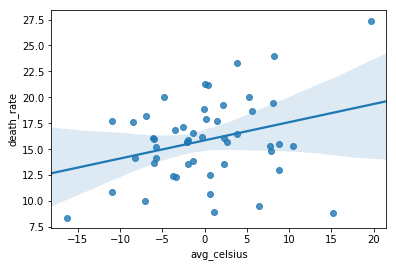

In [40]:
sns.regplot(x= 'avg_celsius', y= 'death_rate', data=combined_data)

/Users/arslanaliawan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


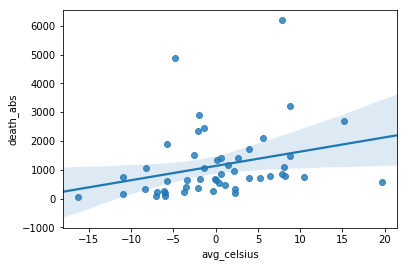

In [41]:
sns.regplot(x= 'avg_celsius', y= 'death_abs', data=combined_data)